# LEAD SCORING CASE STUDY

### Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When 
these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the 
company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, 
some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. 

### Business Goal :

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. 

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead 
score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profile

%matplotlib inline

In [3]:
# Importing dataset

lead_Info = pd.read_csv('Leads.csv', encoding = 'latin')
lead_Info.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# inspect leadInfo dataframe

# info
print(lead_Info.info())
#shape
print('***********************************************************************')
print(lead_Info.shape)
#Columns having null values
print('***********************************************************************')
print(lead_Info.isnull().any())
# Describe
print('*************************************************************************')
lead_Info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Cleaning

In [5]:
# check for percentage of null values in each column

percent_missing = round(100*(lead_Info.isnull().sum()/len(lead_Info.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are some columns that have more than 25% null values.

In [6]:
# Check if there are any duplicate values in the dataset

lead_Info[lead_Info.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values in the data.

In [7]:
# below given columns have a value called select. Converting those values as nan since the customer has not selceted any optionn.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

lead_Info['Specialization'] = lead_Info['Specialization'].replace('Select', np.nan)
lead_Info['How did you hear about X Education'] = lead_Info['How did you hear about X Education'].replace('Select', np.nan)
lead_Info['Lead Profile'] = lead_Info['Lead Profile'].replace('Select', np.nan)
lead_Info['City'] = lead_Info['City'].replace('Select', np.nan)

In [8]:
# check for percentage of null values in each column

percent_missing = round(100*(lead_Info.isnull().sum()/len(lead_Info.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# droping the columns that have more than 30% null values

lead_Info = lead_Info.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [10]:
# check for percentage of null values in each column after dropping columns having more than 30% null values

percent_missing = round(100*(lead_Info.isnull().sum()/len(lead_Info.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Following columns have null values :
    
    - Country
    - Lead Source
    - Total Visits
    - Page Views Per Visit
    - Last Activity    
    - What is your current occupation
    - What matters most to you in choosing a course

In [11]:
# Lets check the value counts for each values in the country column

lead_Info.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
South Africa               4
Sweden                     3
Belgium                    2
Bangladesh                 2
Netherlands                2
Uganda                     2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Philippines                2
China                      2
Russia                     1
Denmark                    1
Indonesia                  1
Kenya                      1
Liberia                    1
Switzerland                1
Tanzania      

In [12]:
# checking percentage of India as value in the country column

country_percentage = round(100*len(lead_Info[lead_Info['Country'] == 'India'])/len(lead_Info['Country']),2)
print(country_percentage)

70.26


In [13]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we will drop the column

lead_Info = lead_Info.drop(['Country'], axis=1)

In [14]:
# Check the value counts for the column Lead Source

lead_Info['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

In [15]:
# From above it can be seen that Google appears two times. Hence we will convert "Google" to the same case.
# Also since "Google" has the major portion of data, we can impute the null values with Google

lead_Info['Lead Source'] = lead_Info['Lead Source'].replace('google', 'Google')
lead_Info['Lead Source'] = lead_Info['Lead Source'].replace(np.nan, 'Google')

In [16]:
# Check the value counts for the column Total Visits

lead_Info['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [17]:
# Checking the median of column 

lead_Info['TotalVisits'].median()

3.0

In [18]:
# We will replace null values in TotalVisits by the median value (3.0)

lead_Info['TotalVisits'] = lead_Info['TotalVisits'].replace(np.nan, lead_Info['TotalVisits'].median())

In [19]:
# Checking value counts for Page Views Per Visit

lead_Info['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [20]:
# Checking median of the column

lead_Info['Page Views Per Visit'].median()

2.0

In [21]:
# We will replace null values in 'Page Views Per Visit' by the median.
lead_Info['Page Views Per Visit'] = lead_Info['Page Views Per Visit'].replace(np.nan, lead_Info['Page Views Per Visit'].median())

In [22]:
# Checking value counts for the column Last Activity

lead_Info['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [23]:
# As we do not have any information of what the last activity of the customer would have been,
# we will add new category 
#called 'Not Sure' for all null values

lead_Info['Last Activity'] = lead_Info['Last Activity'].replace(np.nan, 'Not Sure')

In [24]:
# Checking value counts of column "What is your current Occupation"

lead_Info['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
# As no information has been provided for Current Occupation
# adding new category 'No Information' and set that 
# as value for the null columns

lead_Info['What is your current occupation'] = lead_Info['What is your current occupation'].replace(np.nan, 'No Information')

In [26]:
# Check the value counts for the column What matters most to you in choosing a course 

lead_Info['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
matters_most_percentage = round(100*len(lead_Info[lead_Info['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(lead_Info['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [28]:
# As Better Career Prospects occurs around 70% of times in 'What matters most to you in choosing a course column'

# As column also has around 29% as missing values, we will drop the column

lead_Info = lead_Info.drop(['What matters most to you in choosing a course'], axis=1)

In [29]:
# check for percentage of null values in each column

percent_missing = round(100*(lead_Info.isnull().sum()/len(lead_Info.index)), 2)
print(percent_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the null values in the columns now have either been replaced or dropped.

In [30]:
# As the below have only one value "No" in all the rows, we will drop the column :

lead_Info = lead_Info.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [31]:
lead_Info.shape

(9240, 20)

##### Outlier Treatment

In [32]:
# Checking outliers
lead_Info.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


outlier exist in TotalVisits and Page Views Per Visit columns.

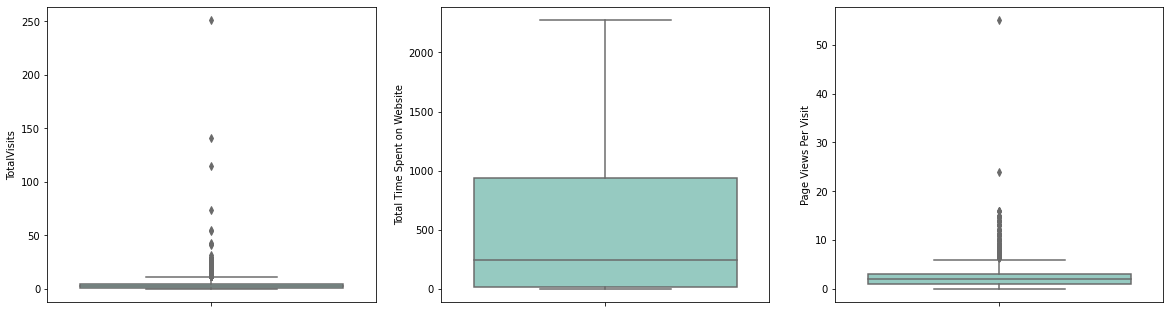

In [33]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = lead_Info)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = lead_Info)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = lead_Info)
plt.show()

In [34]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = lead_Info['TotalVisits'].quantile(0.99)
lead_Info = lead_Info[lead_Info["TotalVisits"] < nn_quartile_total_visits]
lead_Info["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [35]:
# Checking outliers.
lead_Info.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [36]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = lead_Info['Page Views Per Visit'].quantile(0.99)
lead_Info = lead_Info[lead_Info["Page Views Per Visit"] < nn_quartile_page_visits]
lead_Info["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [37]:
# Checking outliers.
lead_Info.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


All the outliers have benn treated.

### Step 3: Data Analysis

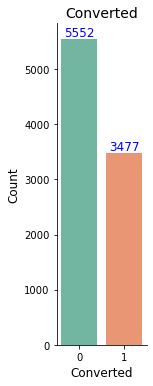

In [38]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=lead_Info, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

there has been aprrox conversion rate of 39%

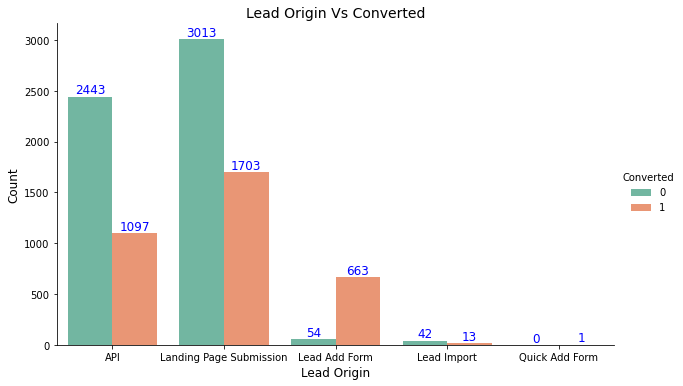

In [39]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_Info, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

 - observed that maximum conversion exit in 'Landing Page Submission'
 - one request from quick add form that got converted.

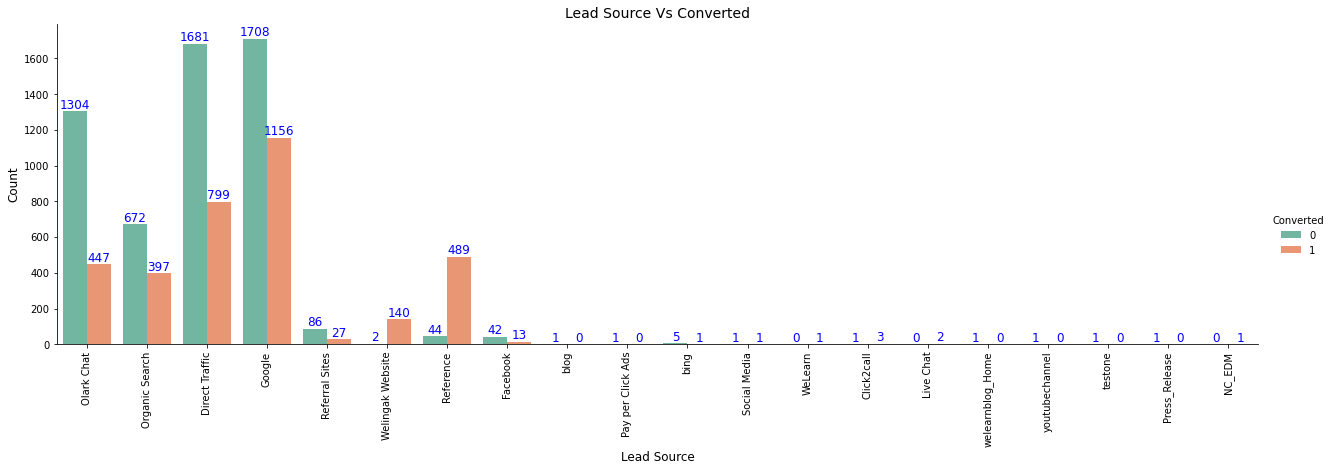

In [40]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_Info, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

observed that major conversion in the lead source is from 'google'.

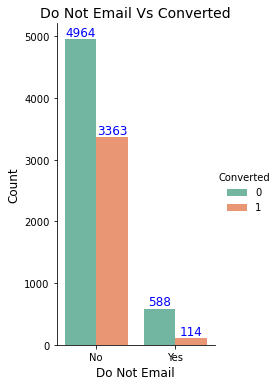

In [41]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead_Info, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Observed major conversion has happend from the emails that have been sent

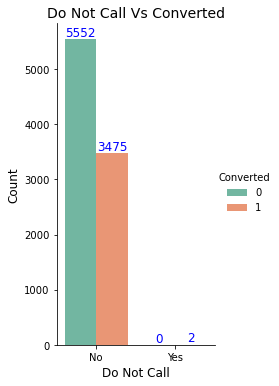

In [42]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead_Info, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Observed that major conversions happened when calls were made.

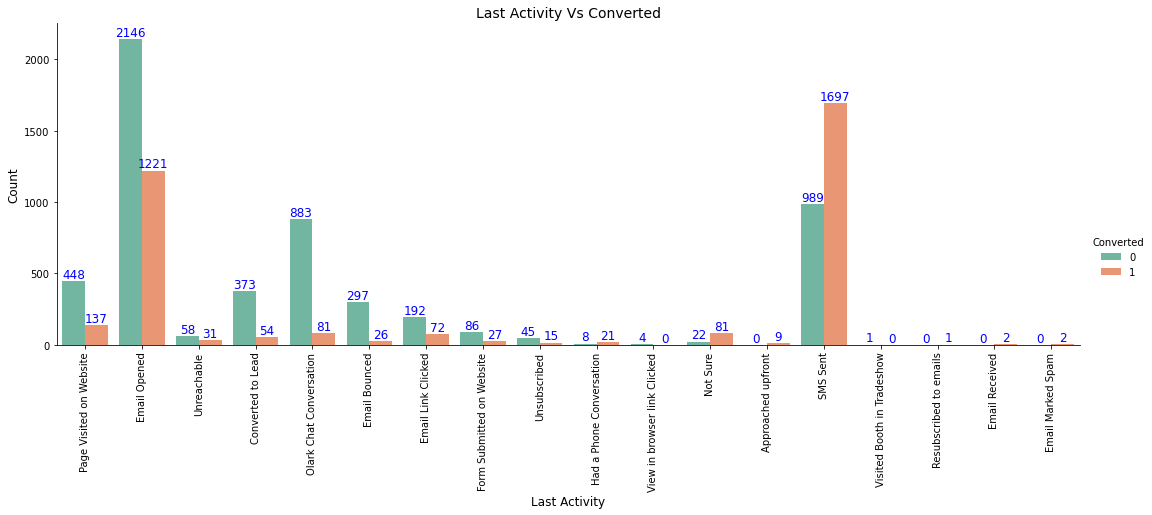

In [43]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_Info, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

last activity value of 'SMS Sent' had more conversion

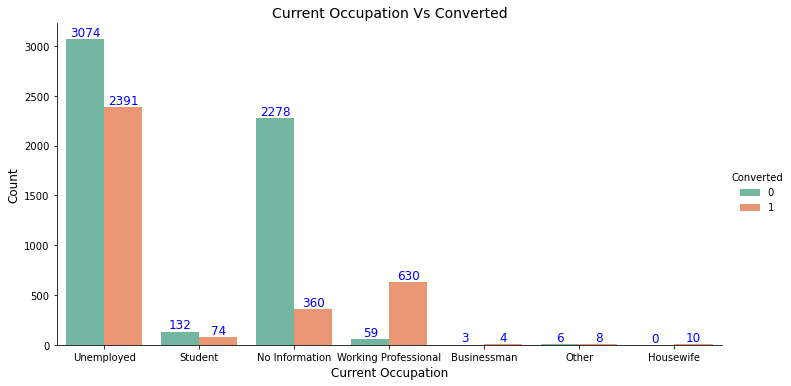

In [44]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead_Info, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed
    - Out of 7 business men, 4 were converted
    - Out 10 housewives, all 10 of them got converted.

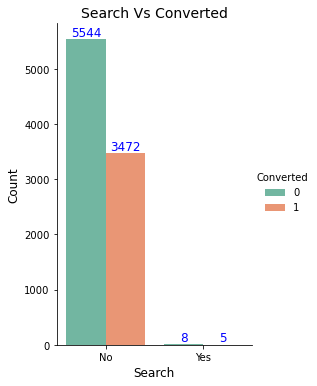

In [45]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead_Info, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

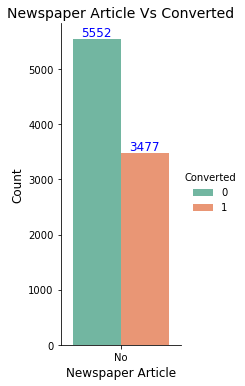

In [46]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead_Info, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As "Newspaper Article" column has only one value for all rows - "No" , we will drop the column.

In [47]:
# Dropping Newspaper Article

leadInfo = lead_Info.drop(['Newspaper Article'], axis=1)

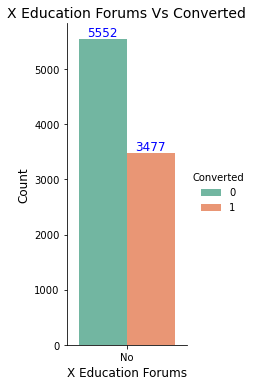

In [48]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , we will drop this column

In [49]:
# Dropping X Education Forum column

leadInfo = leadInfo.drop(['X Education Forums'], axis=1)

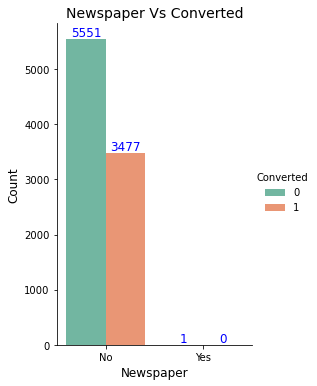

In [50]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can drop the column

In [51]:
# Dropping Newspaper column

leadInfo = leadInfo.drop(['Newspaper'], axis=1)

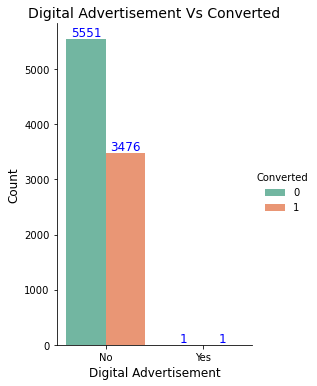

In [52]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

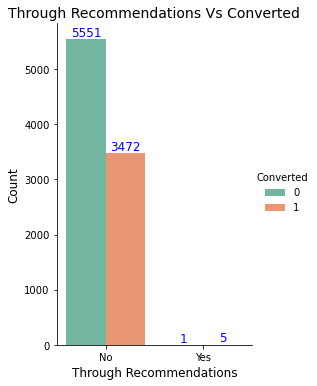

In [53]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

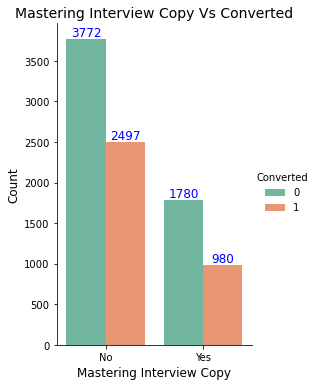

In [54]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leadInfo, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

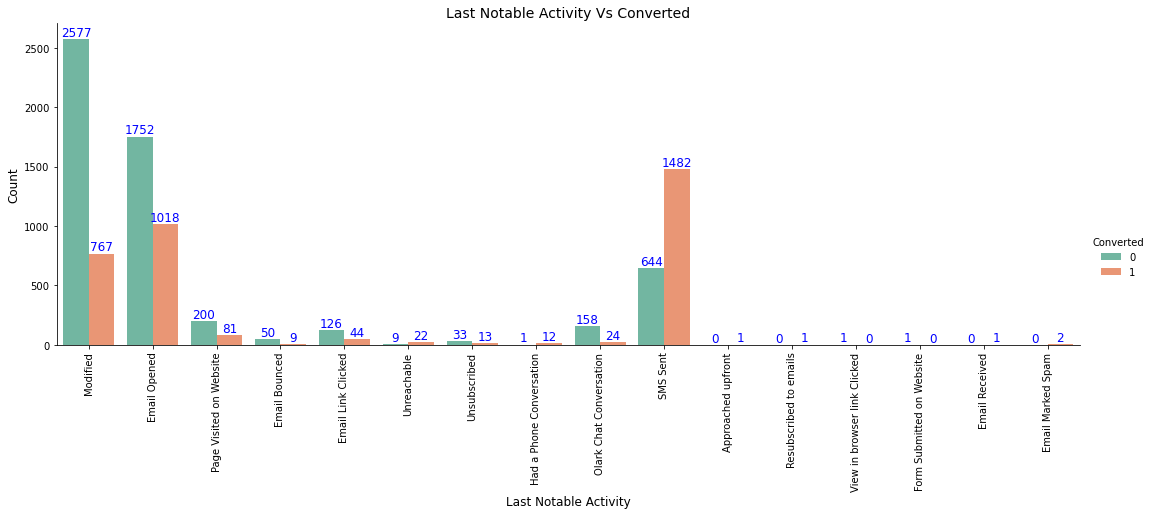

In [55]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

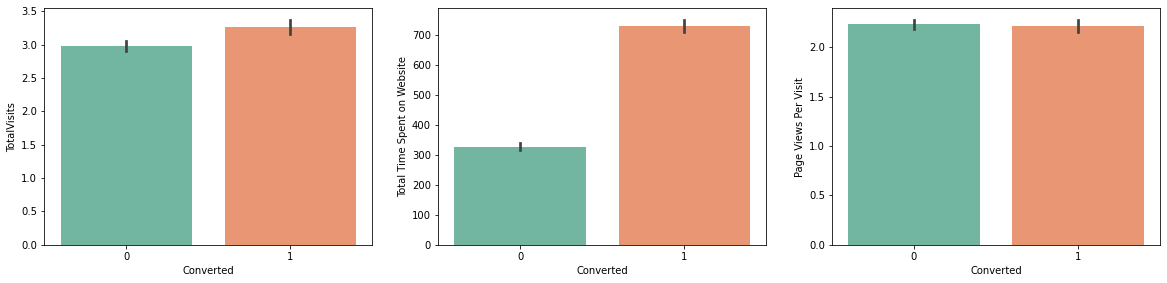

In [56]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadInfo)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

## Step 4: Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [57]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leadInfo[variablelist] = leadInfo[variablelist].apply(binary_map)

In [58]:
# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(leadInfo['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(leadInfo['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(leadInfo['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(leadInfo['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(leadInfo['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_last_notable_activity1], axis=1)

leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
# Remove following columns from the leadInfo

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

leadInfo = leadInfo.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)


In [60]:
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [61]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [62]:
# check shape of the data frame

leadInfo.shape

(9029, 71)

Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

### Step 5: Test-Train Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Putting feature variable to X

X = leadInfo.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
# Putting response variable to y

y = leadInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 6: Rescaling the features with MinMax Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [68]:
### Checking the Conversion Rate percentage

converted = (sum(leadInfo['Converted'])/len(leadInfo['Converted'].index))*100
converted

38.50924797873519

#### We have almost 39% conversion rate

### Step 7: Model Building
Assessing the model with StatsModels

#### Running the Initial Training Model

In [69]:
import statsmodels.api as sm

In [70]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Mar 2021   Deviance:                          nan
Time:                        20:17:08   Pearson chi2:                 6.43e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                              4.59e+14    6.4e+07   7.17e+06      0.000    4.59e+14    4.59e+14
Do Not Email                                     -3.947e+14   4.48e+06  -8.81e+07      0.000   -3.95e+14   -3.95e+14
Do Not Call                                       5.243e+15   4.76e+07    1.1e+08      0.000    5.24e+15    5.24e+15
TotalVisits                                       1.581e+15   7.66e+06   2.07e+08      0.000    1.58e+15    1.58e+15
Total Time Spent on Website                       1.179e+15   4.01e+06   2.94e+08      0.000    1.18e+15    1.18e+15
Page Views Per Visit                             -2.383e+15   6.53e+06  -3.65e+08      0.000   -2.38e+15   -2.38e+15
Search                                           -8.691e+14   2.44e+07  -3.56e+07      0.000   -8.69e+14   -8.69e+14
Digital Advertisement                             1.294e+15   4.76e+07   2.72e+07      0.000    1.29e+15    1.29e+15
Through Recommendations                           9.593e+14    4.2e+07   2.28e+07      0.000    9.59e+14    9.59e+14
A free copy of Mastering The Interview            1.792e+14   2.69e+06   6.66e+07      0.000    1.79e+14    1.79e+14
LeadOrigin_API                                   -3.623e+15   6.74e+07  -5.37e+07      0.000   -3.62e+15   -3.62e+15
LeadOrigin_Landing Page Submission                -3.95e+15   6.74e+07  -5.86e+07      0.000   -3.95e+15   -3.95e+15
LeadOrigin_Lead Add Form                         -1.785e+15   6.86e+07   -2.6e+07      0.000   -1.79e+15   -1.79e+15
LeadOrigin_Lead Import                           -2.482e+15   8.27e+07     -3e+07      0.000   -2.48e+15   -2.48e+15
LeadSource_Click2call                             2.551e+15   4.69e+07   5.44e+07      0.000    2.55e+15    2.55e+15
LeadSource_Direct Traffic                         1.188e+15   1.17e+07   1.02e+08      0.000    1.19e+15    1.19e+15
LeadSource_Facebook                               -6.46e+14   4.62e+07   -1.4e+07      0.000   -6.46e+14   -6.46e+14
LeadSource_Google                                 1.348e+15   1.15e+07   1.17e+08      0.000    1.35e+15    1.35e+15
LeadSource_Live Chat                              1.334e+15   4.67e+07   2.86e+07      0.000    1.33e+15    1.33e+15
LeadSource_Olark Chat                             1.405e+15   1.18e+07   1.19e+08      0.000    1.41e+15    1.41e+15
LeadSource_Organic Search                         1.501e+15   1.18e+07   1.27e+08      0.000     1.5e+15     1.5e+15
LeadSource_Pay per Click Ads                        -4.2839   5.27e-07  -8.12e+06      0.000      -4.284      -4.284
LeadSource_Press_Release                            -3.8293   2.33e-07  -1.64e+07      0.000      -3.829      -3.829
LeadSource_Reference                     

### Step 8: Feature Selection Using RFE

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 45),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 37),
 ('LeadOrigin_API', False, 9),
 ('LeadOrigin_Landing Page Submission', False, 8),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 20),
 ('LeadSource_Click2call', False, 29),
 ('LeadSource_Direct Traffic', False, 16),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 27),
 ('LeadSource_Live Chat', False, 38),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 26),
 ('LeadSource_Pay per Click Ads', False, 46),
 ('LeadSource_Press_Release', False, 50),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 25),
 ('LeadSource_Social Media', False, 41),
 ('LeadSource_WeLearn', False, 47),
 

In [75]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Opened', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

#### Rebuilding Model - Model 2

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.1
Date:                Mon, 08 Mar 2021   Deviance:                       5002.3
Time:                        20:17:18   Pearson chi2:                 6.53e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5570      0.153    -16.659      0.000      -2.858      -2.256
Do Not Email                                    -1.1023      0.176     -6.276      0.000      -1.447      -0.758
TotalVisits                                      1.7989      0.290      6.206      0.000       1.231       2.367
Total Time Spent on Website                      4.5119      0.169     26.717      0.000       4.181       4.843
Page Views Per Visit                            -0.8642      0.250     -3.453      0.001      -1.355      -0.374
Search                                          -1.6356      1.011     -1.618      0.106      -3.617       0.346
LeadOrigin_Lead Add Form                         3.0358      0.512      5.932      0.000       2.033       4.039
LeadSource_Olark Chat                            1.4699      0.134     10.947      0.000       1.207       1.733
LeadSource_Reference                             0.6403      0.540      1.185      0.236      -0.418       1.699
LeadSource_Welingak Website                      2.6586      0.876      3.036      0.002       0.942       4.375
LastActivity_Approached upfront                 23.9469   2.63e+04      0.001      0.999   -5.16e+04    5.17e+04
LastActivity_Email Opened                        0.5394      0.117      4.599      0.000       0.310       0.769
LastActivity_Had a Phone Conversation            1.1718      0.939      1.248      0.212      -0.668       3.011
LastActivity_Olark Chat Conversation            -0.5893      0.190     -3.101      0.002      -0.962      -0.217
LastActivity_SMS Sent                            1.7403      0.118     14.697      0.000       1.508       1.972
CurrentOccupation_Housewife                     23.9667   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
CurrentOccupation_No Information                -1.2346      0.090    -13.681      0.000      -1.411      -1.058
CurrentOccupation_Working Professional           2.6225      0.203     12.889      0.000       2.224       3.021
LastNotableActivity_Had a Phone Conversation     2.3799      1.501      1.585      0.113      -0.562       5.322
LastNotableActivity_Modified                    -0.5521      0.090     -6.131      0.000      -0.729      -0.376
LastNotableActivity_Unreachable                  2.0387      0.556      3.665      0.000       0.948       3.129
================================================================================================================
"""

Removing column LastActivity_Approached_Upfront as it has a high pvalue and hence is insignificant

In [77]:
col = col.drop('LastActivity_Approached upfront',1)

#### Rebuilding Model - Model 3

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Mon, 08 Mar 2021   Deviance:                       5013.2
Time:                        20:17:18   Pearson chi2:                 6.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5414      0.153    -16.608      0.000      -2.841      -2.241
Do Not Email                                    -1.1140      0.175     -6.350      0.000      -1.458      -0.770
TotalVisits                                      1.7878      0.290      6.171      0.000       1.220       2.356
Total Time Spent on Website                      4.5173      0.169     26.768      0.000       4.187       4.848
Page Views Per Visit                            -0.8483      0.250     -3.393      0.001      -1.338      -0.358
Search                                          -1.6363      1.012     -1.617      0.106      -3.620       0.347
LeadOrigin_Lead Add Form                         3.0402      0.511      5.946      0.000       2.038       4.042
LeadSource_Olark Chat                            1.4873      0.134     11.087      0.000       1.224       1.750
LeadSource_Reference                             0.6399      0.540      1.186      0.236      -0.418       1.698
LeadSource_Welingak Website                      2.6555      0.875      3.034      0.002       0.940       4.371
LastActivity_Email Opened                        0.5164      0.117      4.424      0.000       0.288       0.745
LastActivity_Had a Phone Conversation            1.1429      0.939      1.218      0.223      -0.697       2.982
LastActivity_Olark Chat Conversation            -0.6220      0.190     -3.282      0.001      -0.994      -0.250
LastActivity_SMS Sent                            1.7182      0.118     14.579      0.000       1.487       1.949
CurrentOccupation_Housewife                     22.9568   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
CurrentOccupation_No Information                -1.2409      0.090    -13.758      0.000      -1.418      -1.064
CurrentOccupation_Working Professional           2.6161      0.203     12.868      0.000       2.218       3.015
LastNotableActivity_Had a Phone Conversation     2.3908      1.501      1.592      0.111      -0.552       5.333
LastNotableActivity_Modified                    -0.5431      0.090     -6.041      0.000      -0.719      -0.367
LastNotableActivity_Unreachable                  2.0197      0.556      3.630      0.000       0.929       3.110
================================================================================================================
"""

Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [79]:
col = col.drop('CurrentOccupation_Housewife',1)

#### Rebuilding Model - Model 4

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.3
Date:                Mon, 08 Mar 2021   Deviance:                       5026.7
Time:                        20:17:18   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5270      0.153    -16.565      0.000      -2.826      -2.228
Do Not Email                                    -1.1188      0.175     -6.380      0.000      -1.463      -0.775
TotalVisits                                      1.7768      0.289      6.139      0.000       1.210       2.344
Total Time Spent on Website                      4.5123      0.169     26.772      0.000       4.182       4.843
Page Views Per Visit                            -0.8528      0.250     -3.414      0.001      -1.342      -0.363
Search                                          -1.6358      1.011     -1.619      0.106      -3.617       0.345
LeadOrigin_Lead Add Form                         3.0313      0.511      5.930      0.000       2.029       4.033
LeadSource_Olark Chat                            1.4768      0.134     11.028      0.000       1.214       1.739
LeadSource_Reference                             0.6579      0.539      1.220      0.223      -0.399       1.715
LeadSource_Welingak Website                      2.6524      0.875      3.030      0.002       0.937       4.368
LastActivity_Email Opened                        0.5166      0.116      4.440      0.000       0.289       0.745
LastActivity_Had a Phone Conversation            1.1276      0.939      1.201      0.230      -0.712       2.967
LastActivity_Olark Chat Conversation            -0.6290      0.189     -3.322      0.001      -1.000      -0.258
LastActivity_SMS Sent                            1.7107      0.118     14.551      0.000       1.480       1.941
CurrentOccupation_No Information                -1.2457      0.090    -13.822      0.000      -1.422      -1.069
CurrentOccupation_Working Professional           2.6078      0.203     12.834      0.000       2.210       3.006
LastNotableActivity_Had a Phone Conversation     2.3999      1.501      1.598      0.110      -0.543       5.343
LastNotableActivity_Modified                    -0.5378      0.090     -5.995      0.000      -0.714      -0.362
LastNotableActivity_Unreachable                  2.0149      0.556      3.621      0.000       0.924       3.105
================================================================================================================
"""

Removing column LastActivity_Had a Phone Conversation as it has high pvalue and hence is insignificant

In [81]:
col = col.drop('LastActivity_Had a Phone Conversation',1)

#### Rebuilding Model - Model 5

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Mon, 08 Mar 2021   Deviance:                       5028.2
Time:                        20:17:19   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5174      0.152    -16.541      0.000      -2.816      -2.219
Do Not Email                                    -1.1242      0.175     -6.414      0.000      -1.468      -0.781
TotalVisits                                      1.7711      0.289      6.122      0.000       1.204       2.338
Total Time Spent on Website                      4.5135      0.169     26.784      0.000       4.183       4.844
Page Views Per Visit                            -0.8513      0.250     -3.409      0.001      -1.341      -0.362
Search                                          -1.6344      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.0307      0.511      5.931      0.000       2.029       4.032
LeadSource_Olark Chat                            1.4756      0.134     11.022      0.000       1.213       1.738
LeadSource_Reference                             0.6636      0.539      1.231      0.219      -0.393       1.721
LeadSource_Welingak Website                      2.6507      0.875      3.029      0.002       0.935       4.366
LastActivity_Email Opened                        0.5072      0.116      4.373      0.000       0.280       0.735
LastActivity_Olark Chat Conversation            -0.6397      0.189     -3.383      0.001      -1.010      -0.269
LastActivity_SMS Sent                            1.7015      0.117     14.517      0.000       1.472       1.931
CurrentOccupation_No Information                -1.2474      0.090    -13.845      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6117      0.203     12.860      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5194      1.177      2.989      0.003       1.212       5.827
LastNotableActivity_Modified                    -0.5343      0.090     -5.961      0.000      -0.710      -0.359
LastNotableActivity_Unreachable                  2.0066      0.556      3.606      0.000       0.916       3.097
================================================================================================================
"""

Removing column LeadSource_Reference as it has high pvalue and hence is insignificant 

In [83]:
col = col.drop('LeadSource_Reference',1)

#### Rebuilding Model - Model 6

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.8
Date:                Mon, 08 Mar 2021   Deviance:                       5029.6
Time:                        20:17:19   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5134      0.152    -16.526      0.000      -2.811      -2.215
Do Not Email                                    -1.1458      0.175     -6.537      0.000      -1.489      -0.802
TotalVisits                                      1.7681      0.289      6.111      0.000       1.201       2.335
Total Time Spent on Website                      4.5139      0.168     26.791      0.000       4.184       4.844
Page Views Per Visit                            -0.8508      0.250     -3.407      0.001      -1.340      -0.361
Search                                          -1.6345      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.6170      0.208     17.383      0.000       3.209       4.025
LeadSource_Olark Chat                            1.4744      0.134     11.013      0.000       1.212       1.737
LeadSource_Welingak Website                      2.0666      0.742      2.786      0.005       0.613       3.520
LastActivity_Email Opened                        0.5049      0.116      4.358      0.000       0.278       0.732
LastActivity_Olark Chat Conversation            -0.6424      0.189     -3.399      0.001      -1.013      -0.272
LastActivity_SMS Sent                            1.6972      0.117     14.497      0.000       1.468       1.927
CurrentOccupation_No Information                -1.2473      0.090    -13.844      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6144      0.203     12.880      0.000       2.217       3.012
LastNotableActivity_Had a Phone Conversation     3.5160      1.177      2.986      0.003       1.208       5.824
LastNotableActivity_Modified                    -0.5339      0.090     -5.958      0.000      -0.710      -0.358
LastNotableActivity_Unreachable                  2.0050      0.556      3.606      0.000       0.915       3.095
================================================================================================================
"""

Removing column Search as it has high pvalue and hence insignificant

In [85]:
col = col.drop('Search',1)

#### Rebuilding Model - Model 7

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.2
Date:                Mon, 08 Mar 2021   Deviance:                       5032.5
Time:                        20:17:19   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5028      0.152    -16.475      0.000      -2.801      -2.205
Do Not Email                                    -1.1452      0.175     -6.536      0.000      -1.489      -0.802
TotalVisits                                      1.7397      0.289      6.023      0.000       1.174       2.306
Total Time Spent on Website                      4.5109      0.168     26.784      0.000       4.181       4.841
Page Views Per Visit                            -0.8591      0.250     -3.442      0.001      -1.348      -0.370
LeadOrigin_Lead Add Form                         3.6099      0.208     17.356      0.000       3.202       4.018
LeadSource_Olark Chat                            1.4653      0.134     10.951      0.000       1.203       1.728
LeadSource_Welingak Website                      2.0660      0.742      2.786      0.005       0.612       3.520
LastActivity_Email Opened                        0.5006      0.116      4.323      0.000       0.274       0.728
LastActivity_Olark Chat Conversation            -0.6438      0.189     -3.408      0.001      -1.014      -0.273
LastActivity_SMS Sent                            1.6955      0.117     14.489      0.000       1.466       1.925
CurrentOccupation_No Information                -1.2447      0.090    -13.822      0.000      -1.421      -1.068
CurrentOccupation_Working Professional           2.6123      0.203     12.869      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5184      1.176      2.991      0.003       1.213       5.824
LastNotableActivity_Modified                    -0.5330      0.090     -5.949      0.000      -0.709      -0.357
LastNotableActivity_Unreachable                  2.0055      0.556      3.607      0.000       0.916       3.095
================================================================================================================
"""

now we will check VIF

### Checking VIFs

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.11
1,TotalVisits,4.70
7,LastActivity_Email Opened,2.37
2,Total Time Spent on Website,2.14
9,LastActivity_SMS Sent,2.12
5,LeadSource_Olark Chat,2.10
13,LastNotableActivity_Modified,1.78
8,LastActivity_Olark Chat Conversation,1.76
4,LeadOrigin_Lead Add Form,1.62
10,CurrentOccupation_No Information,1.57


There is a high correlation between two variables so we drop the variable with the higher valued VIF value

In [88]:
col = col.drop('Page Views Per Visit',1)

#### Rebuilding Model - Model 8

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.2
Date:                Mon, 08 Mar 2021   Deviance:                       5044.4
Time:                        20:17:20   Pearson chi2:                 6.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.6532      0.146    -18.185      0.000      -2.939      -2.367
Do Not Email                                    -1.1622      0.175     -6.649      0.000      -1.505      -0.820
TotalVisits                                      1.2254      0.247      4.954      0.000       0.741       1.710
Total Time Spent on Website                      4.5066      0.168     26.758      0.000       4.176       4.837
LeadOrigin_Lead Add Form                         3.7825      0.202     18.683      0.000       3.386       4.179
LeadSource_Olark Chat                            1.6450      0.124     13.263      0.000       1.402       1.888
LeadSource_Welingak Website                      2.0756      0.742      2.799      0.005       0.622       3.529
LastActivity_Email Opened                        0.4606      0.115      4.008      0.000       0.235       0.686
LastActivity_Olark Chat Conversation            -0.6504      0.188     -3.453      0.001      -1.020      -0.281
LastActivity_SMS Sent                            1.6433      0.116     14.213      0.000       1.417       1.870
CurrentOccupation_No Information                -1.2327      0.090    -13.734      0.000      -1.409      -1.057
CurrentOccupation_Working Professional           2.6138      0.203     12.876      0.000       2.216       3.012
LastNotableActivity_Had a Phone Conversation     3.4487      1.174      2.937      0.003       1.147       5.750
LastNotableActivity_Modified                    -0.5446      0.089     -6.095      0.000      -0.720      -0.369
LastNotableActivity_Unreachable                  1.9285      0.560      3.442      0.001       0.830       3.027
================================================================================================================
"""

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.63
2,Total Time Spent on Website,2.11
6,LastActivity_Email Opened,2.06
4,LeadSource_Olark Chat,1.94
8,LastActivity_SMS Sent,1.86
7,LastActivity_Olark Chat Conversation,1.75
12,LastNotableActivity_Modified,1.68
3,LeadOrigin_Lead Add Form,1.57
9,CurrentOccupation_No Information,1.57
5,LeadSource_Welingak Website,1.30


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [91]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.701779
113     0.591069
4132    0.765682
5573    0.129061
1109    0.013213
2282    0.030126
2976    0.869418
8431    0.460064
2770    0.739865
5790    0.995442
dtype: float64

In [92]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70177929, 0.59106932, 0.76568166, 0.12906116, 0.01321321,
       0.03012638, 0.86941758, 0.4600642 , 0.7398654 , 0.99544236])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.701779,2240
1,0,0.591069,113
2,1,0.765682,4132
3,0,0.129061,5573
4,0,0.013213,1109


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [94]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.701779,2240,1
1,0,0.591069,113,1
2,1,0.765682,4132,1
3,0,0.129061,5573,0
4,0,0.013213,1109,0


##### Lets check the confusion metrics and accuracy

In [95]:
from sklearn import metrics

In [96]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3413  445]
 [ 708 1754]]


In [97]:
# Predicted     not_converted    converted
# Actual
# not_converted        3413        445
# converted            708        1754

In [98]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8175632911392405


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7124289195775793

In [101]:
# Let us calculate specificity

TN / float(TN+FP)

0.8846552617936755

In [102]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11534473820632452


In [103]:
# positive predictive value 

print (TP / float(TP+FP))

0.7976352887676217


In [104]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8281970395535064


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

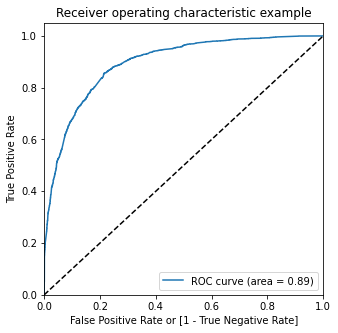

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.701779,2240,1,1,1,1,1,1,1,1,1,0,0
1,0,0.591069,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.765682,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.129061,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.013213,1109,0,1,0,0,0,0,0,0,0,0,0


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.657278  0.972380  0.456195
0.2   0.2  0.760759  0.923233  0.657076
0.3   0.3  0.803165  0.878554  0.755054
0.4   0.4  0.815348  0.780260  0.837740
0.5   0.5  0.817563  0.712429  0.884655
0.6   0.6  0.808703  0.638911  0.917055
0.7   0.7  0.784810  0.530869  0.946864
0.8   0.8  0.763291  0.444354  0.966822
0.9   0.9  0.718987  0.299350  0.986781


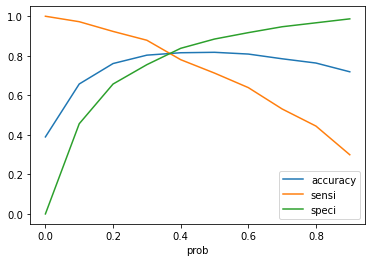

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [111]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.701779,2240,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.591069,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.765682,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.129061,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.013213,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [112]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.701779,2240,1,1,1,1,1,1,1,1,1,0,0,1,70
1,0,0.591069,113,1,1,1,1,1,1,1,0,0,0,0,1,59
2,1,0.765682,4132,1,1,1,1,1,1,1,1,1,0,0,1,77
3,0,0.129061,5573,0,1,1,0,0,0,0,0,0,0,0,0,13
4,0,0.013213,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.030126,2282,0,1,0,0,0,0,0,0,0,0,0,0,3
6,1,0.869418,2976,1,1,1,1,1,1,1,1,1,1,0,1,87
7,0,0.460064,8431,0,1,1,1,1,1,0,0,0,0,0,1,46
8,1,0.739865,2770,1,1,1,1,1,1,1,1,1,0,0,1,74
9,1,0.995442,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [113]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1975
0     487
Name: final_predicted, dtype: int64

In [114]:
# check the precentage of final_predicted conversions

1965/float(1965+497)

0.7981316003249391

##### Hence we can see that the final prediction of conversions have a target of 80% (79.8%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value  on final prediction on train set

In [115]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8136075949367089

In [116]:
#Looking at the confusion matrix for threshold of 0.5
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3167,  691],
       [ 487, 1975]], dtype=int64)

In [117]:
#Looking at the confusion matrix for threshold of 0.37

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3413,  445],
       [ 708, 1754]], dtype=int64)

In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# sensitivity of logistic regression model

TP / float(TP+FN)

0.7124289195775793

In [120]:
# calculate specificity

TN / float(TN+FP)

0.8846552617936755

In [121]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.11534473820632452


In [122]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7976352887676217


In [123]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8281970395535064


##### Metrics - Precision and Recall

In [124]:
from sklearn.metrics import precision_score, recall_score

In [125]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7976352887676217

In [126]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7124289195775793

### Precision and recall tradeoff

In [127]:
from sklearn.metrics import precision_recall_curve

In [128]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

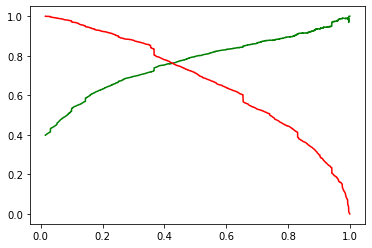

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [131]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [132]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
2296,0,0.1875,0.665313,0,0,0,0,0,1,0,0,0,0,0
8697,0,0.4375,0.184032,0,0,0,0,0,1,0,0,0,0,0
7378,0,0.1250,0.163284,0,0,0,1,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,0,1,0,0,0,1,0
4799,0,0.5000,0.744700,0,0,0,0,0,1,0,0,0,0,0


In [133]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [134]:
y_test_pred = res.predict(X_test_sm)

In [135]:
y_test_pred[:10]

2296    0.901868
8697    0.587969
7378    0.213572
8631    0.660152
4799    0.950680
4503    0.354912
7129    0.872954
1717    0.144281
8398    0.867851
5116    0.251214
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [137]:
# Let's see the head

y_pred_1.head()

,0
2296,0.901868
8697,0.587969
7378,0.213572
8631,0.660152
4799,0.950680


In [138]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [139]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [140]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.901868
1,0,8697,0.587969
2,0,7378,0.213572
3,0,8631,0.660152
4,1,4799,0.950680


In [143]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [144]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [145]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,2296,1,0.901868
1,8697,0,0.587969
2,7378,0,0.213572
3,8631,0,0.660152
4,4799,1,0.950680


In [146]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [147]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,2296,1,0.901868,1
1,8697,0,0.587969,1
2,7378,0,0.213572,0
3,8631,0,0.660152,1
4,4799,1,0.950680,1


In [148]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,2296,1,0.901868,1,90
1,8697,0,0.587969,1,59
2,7378,0,0.213572,0,21
3,8631,0,0.660152,1,66
4,4799,1,0.950680,1,95
5,4503,0,0.354912,0,35
6,7129,0,0.872954,1,87
7,1717,0,0.144281,0,14
8,8398,0,0.867851,1,87
9,5116,1,0.251214,0,25


In [149]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    806
0    209
Name: final_predicted, dtype: int64

In [150]:
# check the precentage of final_predicted conversions on test data

806/float(806+209)

0.7940886699507389

##### Hence we can see that the final prediction of conversions have a target rate of 79.4% (Around 0.6 % short of the predictions made on training data set).

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [151]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8132152085640457

In [152]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1397,  297],
       [ 209,  806]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7940886699507389

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.8246753246753247

##### Precision and Recall metrics for the test set 

In [156]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7307343608340888
recall  0.7940886699507389


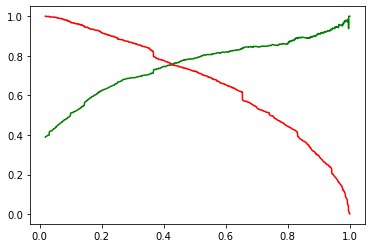

In [157]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Conclusion  :
    
    - While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
      optimal 
      cut off based on Sensitivity and Specificity for calculating the final prediction.
    - Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to 
      the respective values calculated using trained set.
    - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
      around 80%
    - Hence overall this model seems to be good.   

# Conclusion

Valuable Insights -
 - The Accuracy, Precision and Recall score we got from test set in acceptable range.
 - We have high recall score than precision score which we were exactly looking for.
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - **Total time spent on website**
    - **Lead Add Form from Lead Origin** and
    - **Had a Phone Conversation from Last Notable Activity**